<a href="https://colab.research.google.com/github/MaTheusSlv/PosGraduacaoMackenzie_CienciaDeDados/blob/main/RECUPERACAO_DA_INFORMACAO_NA_WEB_E_EM_REDES_SOCIAIS_T6_%E2%80%93_Atividade_de_Aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode
!pip install nltk

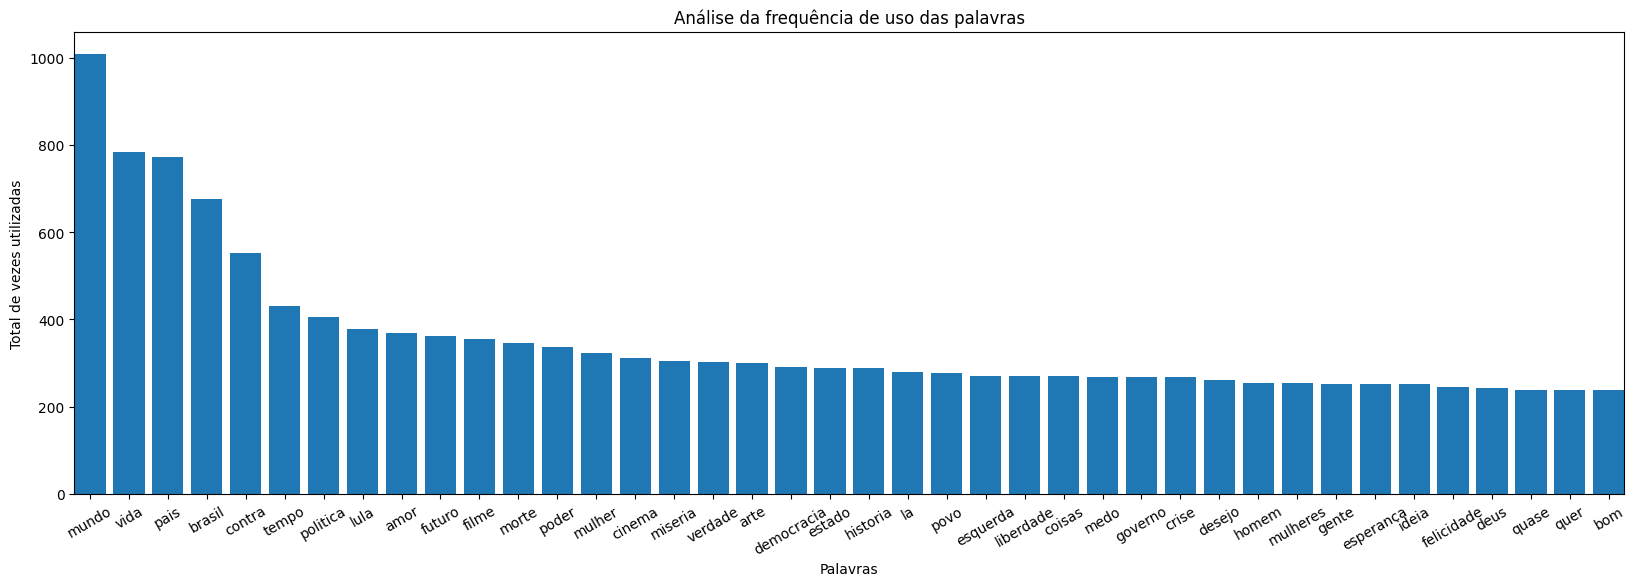

In [ ]:
import json
import pandas as pd
from unidecode import unidecode
import string
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from collections import Counter

#/content/arnaldo_jabor.json

#Carregar conteúdo do arquivo
conteudo = pd.read_json('arnaldo_jabor.json')

#Pegar a coluna dos textos,transformar pra lowercase, e retirar acentuação
sacopalavras = conteudo['content'].str.lower().apply(lambda x: unidecode(x))
#Montar saco de palavras numa linha só
sacopalavras = "".join(sacopalavras)
#Retirar pontuação
sacopalavras = re.sub('[{}]'.format(string.punctuation), '', sacopalavras)
#Retirar números
sacopalavras = re.sub('[{}]'.format(string.digits),'', sacopalavras)
#Retirar alguns caracteres indesejados
sacopalavras = sacopalavras.replace('\\n',"")
sacopalavras = re.sub('” | “','', sacopalavras)

#Retirar stopwords
palavrasindesejadas = ['ai','ali','vi','tudo','hoje','nada','bem','mal','nunca','agora','todos','ainda','todo','outro','sim','novo','apenas','nao','pois','dia','vai','vez','fim','dentro','tao','talvez','ia','fazer','alem','havia','disse','antes','depois','sempre','porque','anos','grande','sobre','onde','assim','pode','ninguem','coisa','diante','ver','cara','ter','nova','claro','mim','aqui','meio']
stopwords = unidecode(','.join(stopwords.words('portuguese'))).split(',')#lista de SW para sem acentuação, por conta da comparação da função
sacopalavras_ssw = list()

for word in sacopalavras.split():
  if word not in stopwords + palavrasindesejadas:
    sacopalavras_ssw.append(''.join(word))

#Contar as vezes que se repetem as palavras
frequencia = {}
for word in sacopalavras_ssw:
  if word in frequencia:
    frequencia[word] += 1
  else:
    frequencia[word] = 1

#Ordernar e selecionar somente as 40 mais frequentes
ordenador = Counter(frequencia)
maisfrequentes = dict(ordenador.most_common(40))

#Plotar
plt.figure(figsize = (20, 6))
plt.title('Análise da frequência de uso das palavras')
plt.xlabel('Palavras')
plt.ylabel('Total de vezes utilizadas')
plt.bar(maisfrequentes.keys(), maisfrequentes.values())
plt.xticks(rotation = 30)
plt.autoscale(axis = 'x', tight=True)
plt.show()